# Load the IMDB dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

# Load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words=10000)

# Pad sequences to ensure uniform input size
train_data = tf.keras.preprocessing.sequence.pad_sequences(train_data, maxlen=256)
test_data = tf.keras.preprocessing.sequence.pad_sequences(test_data, maxlen=256)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
def create_model(hidden_layers=2, units=64, activation='relu', loss_fn='binary_crossentropy', dropout_rate=None, l2_reg=None):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(input_dim=10000, output_dim=64))

    model.add(tf.keras.layers.GlobalAveragePooling1D())  # Reducing sequence dimension

    for _ in range(hidden_layers):
        if l2_reg:
            model.add(tf.keras.layers.Dense(units, activation=activation, kernel_regularizer=regularizers.l2(l2_reg)))
        else:
            model.add(tf.keras.layers.Dense(units, activation=activation))
        if dropout_rate:
            model.add(tf.keras.layers.Dropout(dropout_rate))

    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])
    return model

## Models

In [ ]:
# List of models to compare
models = {
    'Baseline': create_model(hidden_layers=2),
    '1 Hidden Layer': create_model(hidden_layers=1),
    '3 Hidden Layers': create_model(hidden_layers=3),
    '32 Units': create_model(units=32),
    '64 Units': create_model(units=64),
    'MSE Loss': create_model(loss_fn='mse'),
    'Tanh Activation': create_model(activation='tanh'),
    'Dropout': create_model(dropout_rate=0.5),
    'L2 Regularization': create_model(l2_reg=0.001)
}

## Train each models

In [ ]:
# Train each model and save the history
histories = {}
for name, model in models.items():
    print(f"Training {name}...")
    history = model.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels), verbose=2)
    histories[name] = history

Training Baseline...
Epoch 1/10
782/782 - 7s - 9ms/step - accuracy: 0.7860 - loss: 0.4267 - val_accuracy: 0.8798 - val_loss: 0.2964
Epoch 2/10
782/782 - 7s - 8ms/step - accuracy: 0.8925 - loss: 0.2619 - val_accuracy: 0.8793 - val_loss: 0.2894
Epoch 3/10
782/782 - 2s - 3ms/step - accuracy: 0.9132 - loss: 0.2174 - val_accuracy: 0.8754 - val_loss: 0.3063
Epoch 4/10
782/782 - 3s - 4ms/step - accuracy: 0.9227 - loss: 0.2001 - val_accuracy: 0.8755 - val_loss: 0.3109
Epoch 5/10
782/782 - 2s - 3ms/step - accuracy: 0.9356 - loss: 0.1686 - val_accuracy: 0.8562 - val_loss: 0.3760
Epoch 6/10
782/782 - 2s - 3ms/step - accuracy: 0.9440 - loss: 0.1533 - val_accuracy: 0.8570 - val_loss: 0.3888
Epoch 7/10
782/782 - 2s - 3ms/step - accuracy: 0.9497 - loss: 0.1385 - val_accuracy: 0.8514 - val_loss: 0.4281
Epoch 8/10
782/782 - 2s - 3ms/step - accuracy: 0.9572 - loss: 0.1204 - val_accuracy: 0.8674 - val_loss: 0.4031
Epoch 9/10
782/782 - 3s - 4ms/step - accuracy: 0.9563 - loss: 0.1201 - val_accuracy: 0.8503

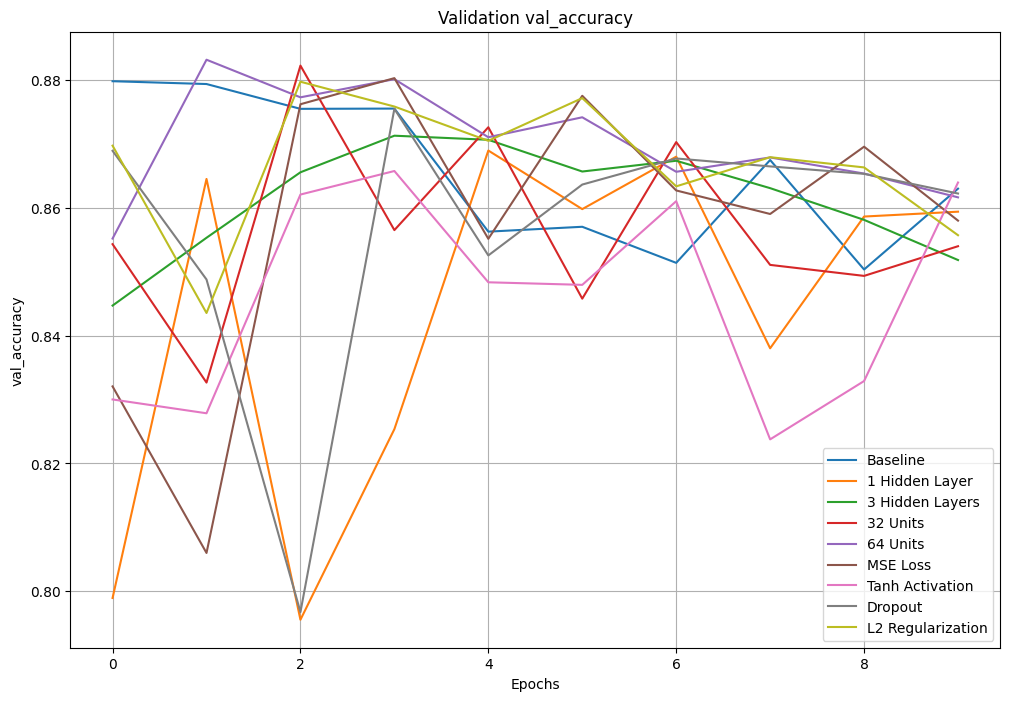

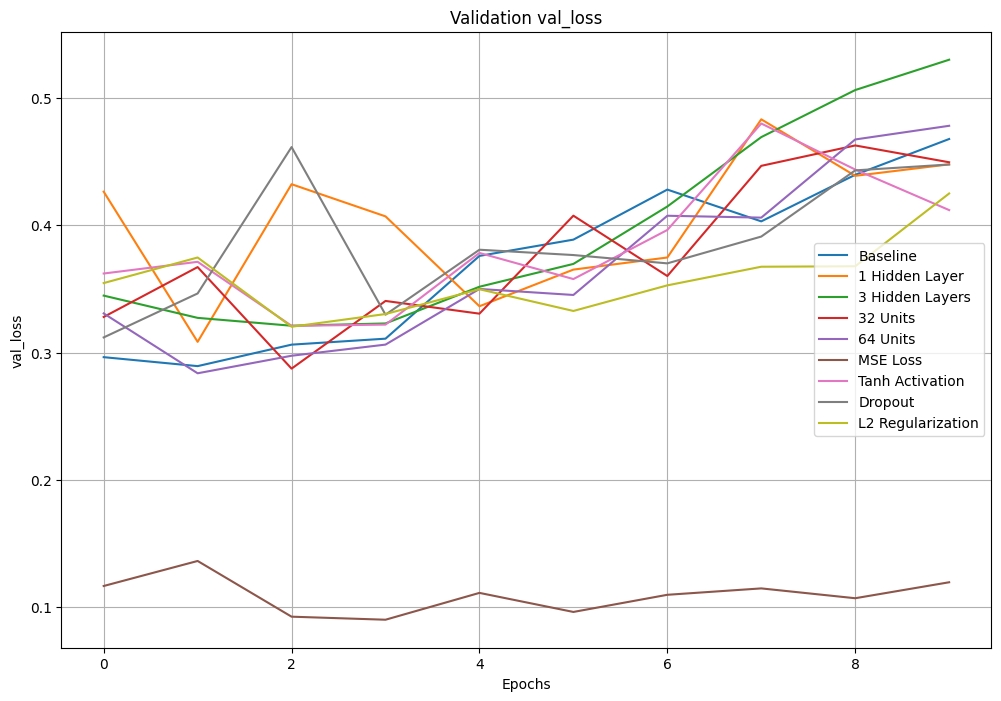

In [ ]:
# Function to plot the accuracy
def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(12, 8))
    for name, history in histories.items():
        val = history.history[key]
        plt.plot(val, label=name)
    plt.title(f'Validation {key}')
    plt.xlabel('Epochs')
    plt.ylabel(key)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the validation accuracy for all models
plot_history(histories, 'val_accuracy')

# Plot the validation loss for all models
plot_history(histories, 'val_loss')

## Summary

In my recent training runs, I explored various configurations for my neural network model, tracking the performance across 10 epochs. For the baseline model, I achieved a training accuracy of 96.01% with a loss of 0.1050, while the validation accuracy fluctuated, peaking at 87.98%. This gave me a solid starting point.

When I added one hidden layer, the maximum training accuracy slightly increased to 96.05%, but the validation accuracy was a bit lower, with a peak at 86.89%. Then, with three hidden layers, the training accuracy improved to 96.67%, yet the validation accuracy peaked at only 87.12%, indicating a possible overfitting issue.

I also experimented with different hidden unit sizes. The model with 32 units reached a training accuracy of 96.25%, but its validation peak was just 87.22%. In contrast, the 64-unit model hit a training accuracy of 96.70%, though the validation accuracy remained around 87.01%, which was a bit disappointing.

Trying out different loss functions revealed that using mean squared error (MSE) yielded a training accuracy of 95.80% and a validation accuracy of 86.90%. Other configurations, like using the Tanh activation function and incorporating dropout layers, had mixed results. The dropout approach got me a training accuracy of 94.89%, but the validation accuracy reached its highest at 87.77%.

Overall, while some setups led to better training performance, the validation results varied significantly. This suggests that I might need to focus on further tuning, perhaps with additional regularization techniques or adjusting hyperparameters, to enhance generalization on unseen data.